In [43]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
import mglearn
from matplotlib import pyplot as plt
from fpdf import FPDF
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import sklearn.datasets

test set score: 0.88


/Users/AndrewCheng/Library/Python/3.6/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/AndrewCheng/Library/Python/3.6/lib/python/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [20]:
iris = load_iris()
logreg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
scores = cross_val_score(logreg, iris.data, iris.target, cv = kfold)
print("Cross validation scores: {}".format(scores))
print("Average CV score: {:.2f}".format(scores.mean()))
#if variance of scores is high: 1. model is dependent on particular folds
#2. or consequence of small size of dataset



Cross validation scores: [1.         0.83333333 1.         1.         0.93333333]
Average CV score: 0.95


In [37]:
#Grid search allows us to try all possible combinations of hyperparameters
#splitting the data into training/valid/test is sensitive to how the data is split
#For a better estimate, use CV + GridSearch
param_grid = {"C": [ 0.001, 0.01, 0.1, 1, 10, 100], 
              "gamma": [ 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

#GridSearchCV uses CV but we still need to split the data into training/testing

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)  #searches for best parameters and automatically fits 
                                    # a new model on the whole training dataset w best hyperparameters
#this automatically uses a training/validation set

#GridSearch class provides convenient interface to access the retrained model via
#the predict and score methods.

print("Test set score: {:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best CV score: {:.2f}".format(grid_search.best_score_))

#Best score is different than the generalization performance computed by score method
#best_score stores the mean cross-validation accuracy, with cross validation performed on training set

#to access the actual mode that was found:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

#analyzing the results of cross-validation


Test set score: 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
Best CV score: 0.97
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


/Users/AndrewCheng/Library/Python/3.6/lib/python/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


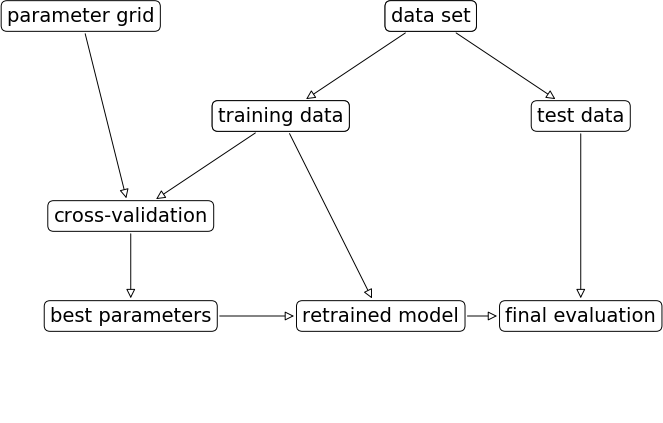

In [30]:
#mglearn.plots.plot_grid_search_overview()
#plt.savefig("Process_Overview.pdf", bbox_inches='tight')

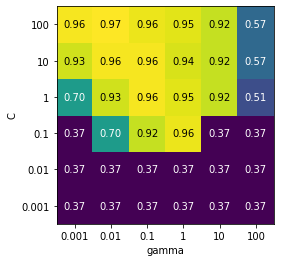

In [44]:
results = pd.DataFrame(grid_search.cv_results_)
#display(results.head())
scores = np.array(results.mean_test_score).reshape(6,6) #extract the mean validation scores
#plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap = 'viridis')

Each point in the heat map corresponds to one run of cross-validation with a particular setting. 
Light colours correspond to high accuracy/Dark -> low accuracy. The plots shows SVC is senstitive to 
settings of the parameter. This implies parameters are very important for obtaining good performance.
Also it's important to observe the ranges for


Now we investiage metrics for Multiclass Classification:

In [45]:
digits = sklearn.datasets.load_digits()
lr = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, pred)))




NameError: name 'sklearn' is not defined